In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [289]:
df1 = pd.read_csv('out/experiment_1/experiment_probabilistic_all.csv')       # FAST-LTS', 'FSA-I', 'FSA-QR', 'MOEA-I', 'MOEA-QR', 'MMEA-I', 'MMEA-QR'  # n = 2, 100, 500, p = 2, 3, 5
df2 = pd.read_csv('out/experiment_1/experiment_probabilistic_big.csv')     # 'FAST-LTS',                   'MOEA-I', 'MOEA-QR', 'MMEA-I', 'MMEA-QR'    # n = 1000,  p =  2,  5, 10, 20  out = 0.1 , 0.3 , 0.45
# df = pd.read_csv('out/experiment_1/experiment_probabilistic_big_p2.csv')  # 'FAST-LTS',                   'MOEA-I', 'MOEA-QR', 'MMEA-I', 'MMEA-QR'    # n = 1000,  p = 2, 5, 10, 20  out = 0.45
df = pd.concat([df1, df2], sort=False)

In [290]:
df_edit = df #.loc[df.rss > 0] 
df_edit = df_edit[df_edit.algorithm != 'FAST-LTS']
df_edit = df_edit.loc[df_edit.out_2model == 0.4]
df_edit.p = df_edit.p + 1
df_final = df_edit.groupby(['n','p', 'out', 'h_size','algorithm']).agg({'time':'mean', 'cos':'mean', 'l2':'mean'}).stack(level=0).unstack(level=4).unstack(level=4) # .stack(level=0).unstack(level=0)
# df_final = df_edit.groupby(['out_2model', 'n','p', 'out', 'h_size','algorithm']).agg({'time':'mean', 'cos':'mean', 'l2':'mean'}).stack(level=0).unstack(level=6).unstack(level=5) # .stack(level=0).unstack(level=0)

df_final.round(decimals=3).head() # .to_latex().replace('\\\\\n', '\\').replace('NaN', '$-$')

algorithm          FSA-I               FSA-QR               MMEA-I         \
                    time    cos     l2   time    cos     l2   time    cos   
n   p out  h_size                                                           
20  3 0.10 12      0.000  0.987  1.648  0.007  0.993  1.584  0.000  0.850   
      0.30 12      0.000  0.978  2.893  0.007  0.980  2.322  0.000  0.595   
      0.45 12      0.000  0.855  9.627  0.003  0.898  8.978  0.000  0.641   
100 4 0.10 52      0.021  0.998  1.030  0.192  0.998  0.916  0.001  0.917   
      0.30 52      0.021  0.998  0.849  0.197  0.998  0.795  0.001  0.752   

algorithm                 MMEA-QR                MOEA-I                 \
                       l2    time    cos      l2   time    cos      l2   
n   p out  h_size                                                        
20  3 0.10 12       9.931   0.000  0.992   1.505  0.000  0.625  37.956   
      0.30 12      23.852   0.000  0.957   2.431  0.000  0.440  55.069   
      0.45 12      26.917   0.000  0.889  10.512  0.000  0.621  43.391   
100 4 0.10 52       4.816   0.003  0.998   0.877  0.004  0.757  24.437   
      0.30 52      10.570   0.003  0.997   0.811  0.003  0.684  28.215   

algorithm         MOEA-QR                 
                     time    cos      l2  
n   p out  h_size                         
20  3 0.10 12       0.000  0.990   1.749  
      0.30 12       0.000  0.973   3.275  
      0.45 12       0.000  0.910  13.152  
100 4 0.10 52       0.007  0.998   0.956  
      0.30 52       0.007  0.998   0.789

# BOX PLOTS

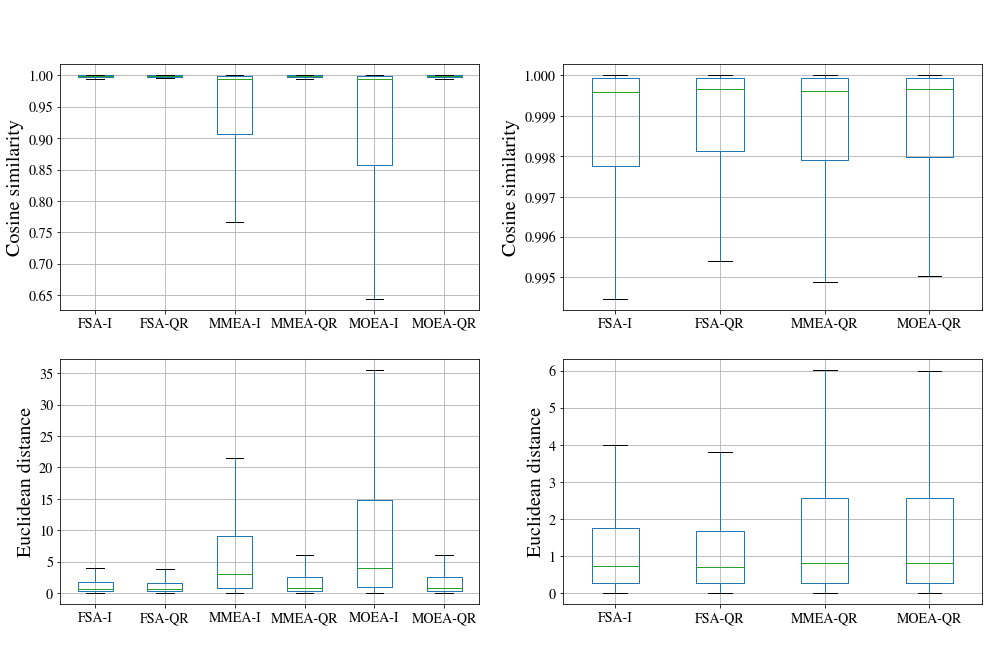

In [292]:
import matplotlib 
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

matplotlib.rcParams.update({'font.size': 14})


fig = plt.figure(figsize=(16,10))
fig.suptitle('This is a somewhat long figure title', fontsize=16)

# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
#plt.suptitle("")

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(221)
ax1.set_title("not working")

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(222)
ax2.set_title("not working")


ax3 = fig.add_subplot(223)
ax3.set_title("not working")

ax4 = fig.add_subplot(224)
ax4.set_title("not working")


# FIRST TWO ROWS 
c = df
c = c[c.algorithm != 'FAST-LTS']

d = c
d.rename(columns={'cos':' '}, inplace=True)
ax = d[['algorithm', ' ']].boxplot(by='algorithm',  showfliers=False, ax=ax1 )
ax.set_xlabel(" ", fontsize=20)
ax.set_ylabel("Cosine similarity", fontsize=20)
plt.suptitle(" ")
plt.title(" ")



c = df
c.rename(columns={'cos':' '}, inplace=True)
c = c[c.algorithm != 'FAST-LTS']
c = c[c.algorithm != 'MMEA-I']
c = c[c.algorithm != 'MOEA-I']

ax = c[['algorithm', ' ']].boxplot(by='algorithm',  showfliers=False, ax=ax2 )
ax.set_xlabel(" ", fontsize=20)
ax.set_ylabel("Cosine similarity", fontsize=20)
plt.suptitle(" ")
plt.title(" ")


# SECOND TWO ROWS


c = df
c = c[c.algorithm != 'FAST-LTS']
d = c
d = d.rename(columns={'l2':'  '})
ax = d[['algorithm', '  ']].boxplot(by='algorithm',  showfliers=False, ax=ax3 )
ax.set_xlabel(" ", fontsize=20)
ax.set_ylabel("Euclidean distance", fontsize=20)
plt.suptitle(" ")
plt.title(" ")



c = df
c = c[c.algorithm != 'FAST-LTS']
c = c[c.algorithm != 'MMEA-I']
c = c[c.algorithm != 'MOEA-I']

ax = c[['algorithm', 'l2']].boxplot(by='algorithm',  showfliers=False, ax=ax4 )
ax.set_xlabel(" ", fontsize=20)
ax.set_ylabel("Euclidean distance", fontsize=20)
plt.suptitle(" ")
plt.title(" ")

#plt.title("Boxplot of Something")


plt.show()

# EXPERIMENTS EXACT

In [430]:
df_edit = df

In [504]:
df = pd.read_csv('out/experiment_2/experiment_exact_all_not_big.csv')

In [496]:
c = df
# c = c[c.algorithm != 'BSA']
# c = c[c.algorithm != 'EXACT']
# c = c[c.algorithm != 'MOEA-QR-BSA']
df_edit = c
df_edit = df_edit.loc[df_edit.out_2model == 0.4]
df_final = df_edit.groupby(['n','p', 'out', 'h_size','algorithm']).agg({"time": {"avg": np.mean, "min": np.min, "max": np.max}}).stack(level=0).reset_index(level=5, drop=True).stack(level=0).unstack(level=4).unstack(level=4) # .stack(level=0).unstack(level=0)
# df_final = df_edit.groupby(['out_2model', 'n','p', 'out', 'h_size','algorithm']).agg({'time':'mean', 'cos':'mean', 'l2':'mean'}).stack(level=0).unstack(level=6).unstack(level=5) # .stack(level=0).unstack(level=0)


df_final.round(decimals=3) #.to_latex().replace('\\\\\n', '\\').replace('NaN', '$-$')

algorithm             BAB                      BSA                   EXACT  \
                      avg     min      max     avg     min     max     avg   
n  p out  h_size                                                             
15 5 0.10 10        0.003   0.002    0.005   2.354   2.001   3.149   0.009   
     0.30 10        0.003   0.002    0.004   2.168   1.834   2.662   0.008   
     0.45 10        0.003   0.002    0.005   2.039   1.766   2.476   0.008   
20 4 0.10 12        0.018   0.013    0.031   1.896   1.756   2.017   0.291   
     0.30 12        0.017   0.012    0.029   1.898   1.721   1.993   0.296   
     0.45 12        0.015   0.011    0.024   1.792   1.720   2.052   0.280   
   5 0.10 13        0.021   0.017    0.032  13.360  12.684  14.357   0.198   
     0.30 13        0.021   0.017    0.032  13.588  12.546  15.029   0.205   
     0.45 13        0.021   0.017    0.031  13.610  12.798  14.894   0.204   
25 4 0.10 15        0.265   0.165    0.473   9.126   8.946   9.366  11.227   
     0.30 15        0.228   0.149    0.419   9.095   8.910   9.318  11.229   
     0.45 15        0.207   0.143    0.378   9.097   8.940   9.307  11.229   
30 3 0.10 17        1.224   0.871    1.585   1.473   1.445   1.496     NaN   
     0.30 17        1.409   1.151    1.670   1.473   1.455   1.505     NaN   
     0.45 17        1.158   0.730    1.625   1.462   1.441   1.491     NaN   
   4 0.10 17        1.307   0.765    2.136  24.280  24.103  24.472     NaN   
     0.30 17        1.524   0.899    2.210  24.222  23.975  24.552     NaN   
     0.45 17        1.235   0.866    2.301  24.180  23.917  24.441     NaN   
40 3 0.10 22      121.401  56.588  240.316   8.390   8.322   8.452     NaN   
     0.30 22       93.298  38.782  174.062   8.380   8.321   8.458     NaN   
     0.45 22       89.391  31.266  174.557   8.394   8.372   8.478     NaN   

algorithm                        MOEA-QR-BAB                MOEA-QR-BSA  \
                     min     max         avg    min     max         avg   
n  p out  h_size                                                          
15 5 0.10 10       0.008   0.012       0.002  0.002   0.003       2.356   
     0.30 10       0.007   0.010       0.002  0.002   0.005       2.167   
     0.45 10       0.007   0.008       0.002  0.001   0.003       2.034   
20 4 0.10 12       0.274   0.312       0.009  0.003   0.025       1.892   
     0.30 12       0.274   0.304       0.008  0.004   0.017       1.898   
     0.45 12       0.275   0.308       0.008  0.003   0.015       1.790   
   5 0.10 13       0.194   0.203       0.011  0.006   0.020      13.326   
     0.30 13       0.193   0.223       0.010  0.005   0.022      13.554   
     0.45 13       0.188   0.244       0.010  0.005   0.022      13.546   
25 4 0.10 15      11.000  11.394       0.081  0.020   0.224       9.119   
     0.30 15      11.024  11.346       0.063  0.017   0.170       9.096   
     0.45 15      11.017  11.395       0.058  0.019   0.153       9.091   
30 3 0.10 17         NaN     NaN       0.293  0.074   0.562       1.472   
     0.30 17         NaN     NaN       0.531  0.176   1.519       1.471   
     0.45 17         NaN     NaN       0.244  0.073   0.464       1.464   
   4 0.10 17         NaN     NaN       0.380  0.251   0.673      24.287   
     0.30 17         NaN     NaN       0.323  0.113   0.781      24.208   
     0.45 17         NaN     NaN       0.274  0.128   0.673      24.148   
40 3 0.10 22         NaN     NaN      21.435  7.312  50.445       8.396   
     0.30 22         NaN     NaN       7.905  1.334  17.158       8.369   
     0.45 22         NaN     NaN       8.883  1.382  38.292       8.380   

algorithm                         
                     min     max  
n  p out  h_size                  
15 5 0.10 10       1.994   3.167  
     0.30 10       1.833   2.643  
     0.45 10       1.774   2.390  
20 4 0.10 12       1.748   2.017  
     0.30 12       1.731   2.031  
     0.45 12       1.721   1.990  
   5 0.10 1

# PLOTTING

In [531]:
# df_edit = df_edit.loc[df_edit.out_2model == 0.4]
c= df
#c = c[c.algorithm != 'BAB']
c = c[c.algorithm != 'EXACT']
#c = c[c.algorithm != 'MOEA-QR-BAB']
df_edit = c
#df_edit['bab_times'] = df_edit.

In [584]:
df_edit.rename(columns={'algorithm':'Multiplicative improvement'}, inplace=True)
df_final = df_edit.groupby(['n','p', 'out', 'h_size','Multiplicative improvement']).agg({"time": {"avg": np.mean}}).stack(level=0).reset_index(level=5, drop=True).stack(level=0).unstack(level=4).reset_index(level=4, drop=True).reset_index(level=3, drop=True) #.unstack(level=4) # .stack(level=0).unstack(level=0)
df_final['FSA-QR-BAB'] = df_final.BAB / df_final['MOEA-QR-BAB'] 
df_final['FSA-QR-BSA'] = df_final.BSA /  df_final['MOEA-QR-BSA']


In [585]:
df_final

Multiplicative improvement         BAB        BSA  MOEA-QR-BAB  MOEA-QR-BSA  \
n  p out                                                                      
15 5 0.10                     0.002957   2.282722     0.002193     2.282918   
     0.30                     0.002801   2.111859     0.002084     2.110589   
     0.45                     0.002876   2.077310     0.002164     2.076257   
20 4 0.10                     0.017793   1.885758     0.009311     1.884084   
     0.30                     0.016434   1.875563     0.007699     1.875528   
     0.45                     0.014994   1.824987     0.007818     1.824119   
   5 0.10                     0.022053  13.572612     0.010906    13.522639   
     0.30                     0.020952  13.472590     0.009519    13.426823   
     0.45                     0.020845  13.590496     0.010075    13.535228   
25 4 0.10                     0.235053   8.420510     0.075470     8.413095   
     0.30                     0.210361   8.443208     0.057385     8.439280   
     0.45                     0.210750   9.099703     0.060847     9.092623   
30 3 0.10                     1.646402   1.483608     0.406078     1.486706   
     0.30                     1.408967   1.480200     0.394800     1.480267   
     0.45                     1.144567   1.476233     0.261233     1.474833   
   4 0.10                     1.433500  24.224567     0.386033    24.174400   
     0.30                     1.361200  24.184500     0.247433    24.159167   
     0.45                     1.239033  24.160467     0.384500    24.159700   
40 3 0.10                   111.065733   8.929667    19.634067     8.938167   
     0.30                    91.859599   8.418233    10.196900     8.421400   
     0.45                    73.545467   8.409200     9.648400     8.406267   

Multiplicative improvement  FSA-QR-BAB  FSA-QR-BSA  
n  p out                                            
15 5 0.10                     1.348455    0.999914  
     0.30                     1.343940    1.000602  
     0.45                     1.329024    1.000507  
20 4 0.10                     1.911079    1.000888  
     0.30                     2.134499    1.000019  
     0.45                     1.918019    1.000476  
   5 0.10                     2.022087    1.003696  
     0.30                     2.201123    1.003409  
     0.45                     2.068870    1.004083  
25 4 0.10                     3.114535    1.000881  
     0.30                     3.665782    1.000465  
     0.45                     3.463624    1.000779  
30 3 0.10                     4.054394    0.997916  
     0.30                     3.568811    0.999955  
     0.45                     4.381396    1.000949  
   4 0.10                     3.713410    1.002075  
     0.30                     5.501280    1.001049  
     0.45                     3.222453    1.000032  
40 3 0.10                     5.656787    0.999049  
     0.30                     9.008581    0.999624  
     0.45                     7.622556    1.000349

In [586]:
g = df_final.drop(columns=['BAB', 'BSA', 'MOEA-QR-BAB', 'MOEA-QR-BSA' ]).reset_index(level=2, drop=True)

Text(0.5, 0, ' ')

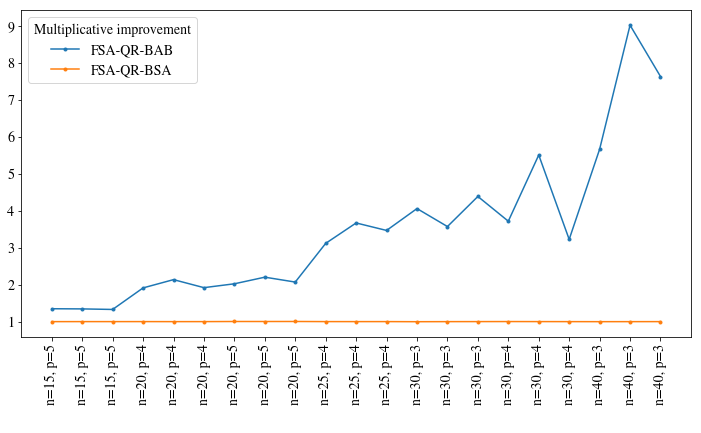

In [587]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(111)
ax = g.plot(style=".-", ax=ax1)
ax.set_xticks(range(len(g)));
ax.set_xticklabels(["n=%s, p=%0d" % item for item in g.index.tolist()], rotation=90);
ax.set_xlabel(" ", fontsize=20)

In [589]:
df = pd.read_csv('out/experiment_2/experiment_exact_bsa_big.csv')        #  we use this later .....

In [599]:
c = df
# c = c[c.algorithm != 'BSA']
# c = c[c.algorithm != 'EXACT']
# c = c[c.algorithm != 'MOEA-QR-BSA']
df_edit = c
# df_edit = df_edit.loc[df_edit.out_2model == 0.4]
df_final = df_edit.groupby(['out_2model' , 'n', 'out', 'h_size']).agg({"time": {"avg": np.mean, "min": np.min, "max": np.max}}).stack(level=0).stack(level=0).unstack(level=0).unstack(level=4).reset_index(level=3, drop=True) #.stack(level=0).unstack(level=4).unstack(level=4) # .stack(level=0).unstack(level=0)
df_final.round(decimals=3).to_latex().replace('\\\\\n', '\\').replace('NaN', '$-$')

'\\begin{tabular}{lllrrrrrrrrr}\n\\toprule\n    &      & out\\_2model & \\multicolumn{3}{l}{0.0} & \\multicolumn{3}{l}{0.4} & \\multicolumn{3}{l}{1.0} \\    &      & {} &       avg &       min &       max &      avg &      min &      max &      avg &      min &      max \\n & out & h\\_size &           &           &           &          &          &          &          &          &          \\\\midrule\n100 & 0.10 & 51  &     5.499 &     5.213 &     6.860 &    5.206 &    5.150 &    5.273 &    5.215 &    5.166 &    5.342 \\    & 0.30 & 51  &     5.598 &     5.125 &     6.852 &    5.345 &    5.129 &    6.707 &    5.198 &    5.142 &    5.309 \\    & 0.45 & 51  &     5.978 &     5.161 &     6.902 &    5.347 &    5.099 &    6.724 &    5.425 &    5.164 &    6.989 \\200 & 0.10 & 101 &    81.172 &    80.042 &    81.582 &   81.280 &   80.816 &   81.575 &   82.678 &   81.153 &   93.849 \\    & 0.30 & 101 &    80.992 &    80.416 &    81.396 &   82.482 &   80.789 &   94.172 &   81.250 &   80.008 &

# Experiments Random

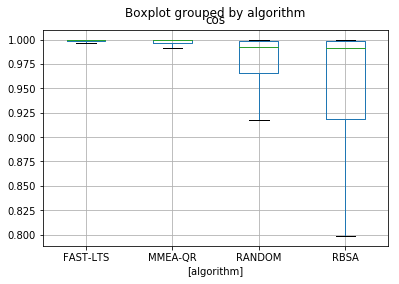

In [108]:
df = pd.read_csv('out/experiment_random.csv')      
df_edit = df #.loc[df.rss > 0] 
# df_edit = df_edit[df_edit.algorithm != 'FAST-LTS']
df_edit = df_edit.loc[df_edit.out_2model == 0.4]
df_edit.p = df_edit.p + 1
df_final = df_edit.groupby(['n','p', 'out', 'h_size','algorithm']).agg({'time':'mean', 'cos':'mean', 'l2':'mean'}).stack(level=0).unstack(level=4).unstack(level=4) # .stack(level=0).unstack(level=0)
#df_final.round(decimals=3).to_latex().replace('\\\\\n', '\\').replace('NaN', '$-$')

df_edit[['algorithm', 'cos']].boxplot(by='algorithm',  showfliers=False ) 

In [109]:
df = df_edit

Text(0.5, 1.0, ' ')

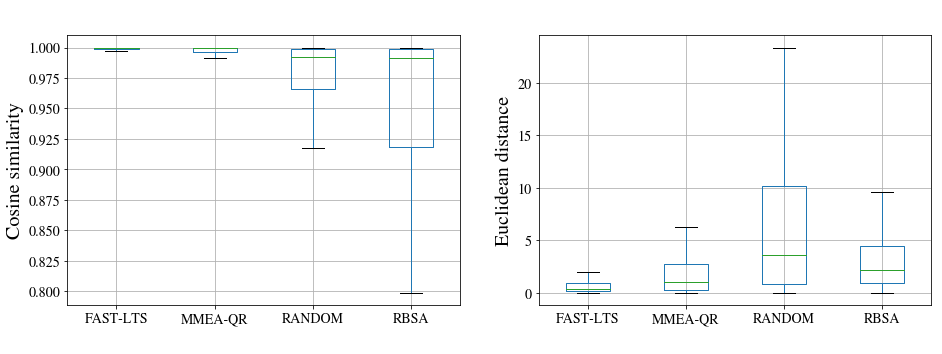

In [118]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

matplotlib.rcParams.update({'font.size': 14})


fig = plt.figure(figsize=(15,5))
fig.suptitle('This is a somewhat long figure title', fontsize=16)

# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
#plt.suptitle("")

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(121)
ax1.set_title("not working")

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(122)
ax2.set_title("not working")



# FIRST TWO ROWS 
c = df
#c = c[c.algorithm != 'FAST-LTS']

d = c
d.rename(columns={'cos':' '}, inplace=True)
ax = d[['algorithm', ' ']].boxplot(by='algorithm',  showfliers=False, ax=ax1 )
ax.set_xlabel(" ", fontsize=20)
ax.set_ylabel("Cosine similarity", fontsize=20)
plt.suptitle(" ")
plt.title(" ")



c = df
# c = c[c.algorithm != 'FAST-LTS']
d = c
d = d.rename(columns={'l2':'  '})
ax = d[['algorithm', '  ']].boxplot(by='algorithm',  showfliers=False, ax=ax2 )
ax.set_xlabel(" ", fontsize=20)
ax.set_ylabel("Euclidean distance", fontsize=20)
plt.suptitle(" ")
plt.title(" ")


# EXPERIMENT COMBINED

In [3]:
import math

In [119]:
df = pd.read_csv('out/experiment_combined.csv')  
df_edit = df
df_final = df_edit.groupby(['n','p', 'out', 'h_size','algorithm', ]).agg({ 'cos':'mean', 'l2':'mean', 'iter':'mean'}).stack(level=0).unstack(level=4).unstack(level=4) # .stack(level=0).unstack(level=0)
df_final.describe()

algorithm   FAST-LTS                       FAST-LTS-MMEA-QR             \
                 cos         l2       iter              cos         l2   
count      15.000000  15.000000  15.000000        15.000000  15.000000   
mean        0.956967   1.039544  10.680000         0.957278   1.602360   
std         0.073978   0.686404   4.810171         0.065430   1.238725   
min         0.769327   0.433833   3.900000         0.819310   0.384849   
25%         0.950405   0.597991   8.366667         0.934194   0.832056   
50%         0.993225   0.896048   9.766667         0.994000   1.242929   
75%         0.998386   1.177736  13.916667         0.998719   1.742265   
max         0.999550   3.128764  19.466667         0.999754   4.910209   

algorithm            FAST-LTS-MOEA-QR                          MMEA-QR  \
                iter              cos         l2       iter        cos   
count      15.000000        15.000000  15.000000  15.000000  15.000000   
mean       28.128889         0.956352   1.639808  28.006667   0.956430   
std        13.155106         0.065911   1.345521  13.249931   0.065759   
min         5.000000         0.819310   0.272911   4.766667   0.819310   
25%        26.966667         0.928508   0.911830  25.850000   0.928326   
50%        28.533333         0.993882   1.242929  28.466667   0.993882   
75%        40.000000         0.998784   1.784077  40.000000   0.998736   
max        40.000000         0.999745   5.374524  40.000000   0.999720   

algorithm                          MOEA-QR                        
                  l2       iter        cos         l2       iter  
count      15.000000  15.000000  15.000000  15.000000  15.000000  
mean        1.665437  28.033333   0.957507   1.625518  27.824444  
std         1.355178  13.264333   0.065505   1.377739  13.286366  
min         0.332172   4.666667   0.819310   0.278726   4.600000  
25%         0.909544  26.583333   0.937899   0.830540  26.450000  
50%         1.242929  28.666667   0.993882   1.242929  27.600000  
75%         1.800047  40.000000   0.998578   1.750710  40.000000  
max         5.502342  40.000000   0.999813   5.628915  40.000000

In [87]:
#conc =conc.drop(['tmp2', 'tmp4', 'tmp5','tmp6', 'tmp7', 'tmp8'], axis=1)

conc.describe()
conc.drop(conc.columns[[0]], axis = 1).to_csv('out/experiment_combined_final_final.csv')

In [120]:
df = pd.read_csv('out/experiment_combined_final_final.csv')  
df.describe()
df['improv'] = np.where(  (df['iter'] == 0),False  ,  True)

In [150]:
df_tmp = df.loc[df.algorithm != 'FAST-LTS']
df_tmp = df_tmp.loc[df_tmp.algorithm != 'MMEA-QR']
df_tmp = df_tmp.loc[df_tmp.algorithm != 'MOEA-QR']
df_tmp.groupby('algorithm')['improv'].sum()


df_final = df_tmp.groupby(['out_2model',  'algorithm', ]).agg({ 'improv':'sum'}).stack(level=0).unstack(level=1).unstack(level=1).stack(level=1).reset_index(level=1, drop=True)  # .stack(level=0).unstack(level=0)

df_final['FAST-LTS-MOEA-QR'] = df_final['FAST-LTS-MOEA-QR']  + 2

df_final['FAST-LTS-MMEA-QR'] = df_final['FAST-LTS-MMEA-QR']/3
df_final['FAST-LTS-MOEA-QR'] = df_final['FAST-LTS-MOEA-QR']/3
df_final.stack(level=0).unstack(level=0).round(decimals=2).to_latex().replace('\\\\\n', '\\').replace('NaN', '$-$')

'\\begin{tabular}{lrrr}\n\\toprule\nout\\_2model &    0.0 &    0.4 &    1.0 \\algorithm        &        &        &        \\\\midrule\nFAST-LTS-MMEA-QR &  30.33 &  34.00 &  33.00 \\FAST-LTS-MOEA-QR &  30.33 &  35.33 &  33.33 \\\\bottomrule\n\\end{tabular}\n'

In [72]:
df = df.loc[df.out_2model == 0.4]
df_final = df.groupby(['n','p', 'out', 'h_size','algorithm', ]).agg({ 'cos':'mean', 'l2':'mean', 'iter':'mean'}).stack(level=0).unstack(level=4).unstack(level=4) # .stack(level=0).unstack(level=0)
# conc = conc.loc[conc.algorithm != 'FAST-LTS']
df_final.round(decimals=4).to_latex().replace('\\\\\n', '\\').replace('NaN', '$-$')
# conc[['algorithm', 'cos']].boxplot(by='algorithm',  showfliers=False )
# df_final.describe()
# conc = conc.loc[conc.algorithm != 'FAST-LTS']
# conc = conc.loc[conc.algorithm != 'MOEA-QR']
# conc = conc.loc[conc.algorithm != 'MMEA-QR']

# conc[['algorithm', 'cos']].boxplot(by='algorithm',  showfliers=False )
# conc.describe()

'\\begin{tabular}{llllrrrrrrrrrrrrrrr}\n\\toprule\n    &   &      & algorithm & \\multicolumn{3}{l}{FAST-LTS} & \\multicolumn{3}{l}{FAST-LTS-MMEA-QR} & \\multicolumn{3}{l}{FAST-LTS-MOEA-QR} & \\multicolumn{3}{l}{MMEA-QR} & \\multicolumn{3}{l}{MOEA-QR} \\    &   &      & {} &      cos &      l2 &  iter &              cos &      l2 &  iter &              cos &      l2 &  iter &     cos &      l2 &  iter &     cos &      l2 &  iter \\n & p & out & h\\_size &          &         &       &                  &         &       &                  &         &       &         &         &       &         &         &       \\\\midrule\n20  & 3 & 0.10 & 12  &   0.9817 &  1.8058 &   4.1 &           0.9949 &  0.9275 &   1.1 &           0.9949 &  0.9275 &   0.7 &  0.9833 &  1.7182 &   5.0 &  0.9833 &  1.7182 &   5.1 \\    &   & 0.30 & 12  &   0.9922 &  1.1600 &   4.4 &           0.9977 &  0.6342 &   1.8 &           0.9977 &  0.6342 &   1.2 &  0.9967 &  1.0598 &   4.9 &  0.9967 &  1.0598 &   5.5 \\    & 

In [797]:
pes = df_edit

In [801]:
df_fast_mmea = df_fast_mmea.drop(['tmp2', 'tmp4', 'tmp5','tmp5', 'tmp7', 'tmp8', 'tmp9', 'tmp10'], axis=1)

In [802]:
# TEST CONCAT
df = pd.read_csv('out/experiment_combined.csv')        
df = df[df.algorithm != 'FAST-LTS-MMEA-QR']

conc = pd.concat([df, df_fast_mmea], sort=False)

In [ ]:
df_final = conc
df_final = df_edit.groupby(['n','p', 'out', 'h_size','algorithm', ]).agg({ 'cos':'mean', 'l2':'mean', 'iter':'mean'}).stack(level=0).unstack(level=4).unstack(level=4) # .stack(level=0).unstack(level=0)
conc[['algorithm', 'cos']].boxplot(by='algorithm',  showfliers=False )


df = conc

algorithm          FAST-LTS                 FAST-LTS-MMEA-QR                  \
                        cos        l2  iter              cos        l2  iter   
n   p out  h_size                                                              
20  3 0.10 12      0.981733  1.805772   4.1         0.983326  1.718173   1.9   
      0.30 12      0.992170  1.159950   4.4         0.996710  1.059788   2.0   
      0.45 12      0.930581  1.336796   3.4         0.951980  1.207964   2.3   
100 4 0.10 52      0.998307  1.292319   8.4         0.998673  1.082273  10.3   
      0.30 52      0.998329  0.863776   9.3         0.999270  1.027624  10.5   
      0.45 52      0.998820  0.739060   8.3         0.998981  0.718473  11.2   
    6 0.10 53      0.989216  2.164403   8.3         0.991661  1.574870  10.0   
      0.30 53      0.998149  1.063067   9.8         0.998697  0.882640  11.2   
      0.45 53      0.998307  0.550115   9.9         0.997731  0.768777  11.5   
500 3 0.10 252     0.999694  0.344877  17.0         0.999921  0.293081  16.2   
      0.30 252     0.999405  0.681016  15.2         0.999565  0.999560  17.1   
      0.45 252     0.999942  0.315127  14.2         0.998059  1.757928  15.9   
    6 0.10 253     0.999588  0.402057  20.9         0.999878  0.255705  14.5   
      0.30 253     0.999651  0.721032  18.3         0.999717  0.651868  15.7   
      0.45 253     0.999577  0.657810  12.6         0.995173  3.265959  14.6   

algorithm         FAST-LTS-MOEA-QR                   MMEA-QR                  \
                               cos        l2  iter       cos        l2  iter   
n   p out  h_size                                                              
20  3 0.10 12             0.983326  1.718173   2.4  0.983326  1.718173   5.0   
      0.30 12             0.996710  1.059788   2.7  0.996710  1.059788   4.9   
      0.45 12             0.951980  1.207964   1.9  0.951980  1.207964   4.8   
100 4 0.10 52             0.998673  1.082273  10.9  0.998673  1.082273  26.7   
      0.30 52             0.999270  1.027624  12.4  0.999270  1.027624  27.8   
      0.45 52             0.998981  0.718473  11.2  0.998981  0.718473  27.9   
    6 0.10 53             0.991250  1.558936   9.3  0.991250  1.558936  26.8   
      0.30 53             0.998476  0.873547  12.0  0.998476  0.873547  25.7   
      0.45 53             0.997731  0.768777  11.4  0.997731  0.768777  27.5   
500 3 0.10 252            0.999893  0.177407  15.3  0.999889  0.315334  40.0   
      0.30 252            0.999682  0.596333  16.0  0.999282  0.663297  40.0   
      0.45 252            0.996412  1.560038  15.1  0.997239  2.023270  40.0   
    6 0.10 253            0.999890  0.179085  15.4  0.999813  0.190438  40.0   
      0.30 253            0.999570  1.083164  15.8  0.999521  0.937405  40.0   
      0.45 253            0.994465  3.444132  16.5  0.995168  3.760513  40.0   

algorithm           MOEA-QR                  
                        cos        l2  iter  
n   p out  h_size                            
20  3 0.10 12      0.983326  1.718173   5.1  
      0.30 12      0.996710  1.059788   5.5  
      0.45 12      0.951980  1.207964   4.3  
100 4 0.10 52      0.998673  1.082273  25.7  
      0.30 52      0.999270  1.027624  26.2  
      0.45 52      0.998981  0.718473  26.6  
    6 0.10 53      0.991229  1.541262  25.5  
      0.30 53      0.998476  0.873547  27.5  
      0.45 53      0.997731  0.768777  27.7  
500 3 0.10 252     0.999896  0.260180  40.0  
      0.30 252     0.999045  1.059731  40.0  
      0.45 252     0.996759  1.713051  40.0  
    6 0.10 253     0.999888  0.147734  40.0  
      0.30 253     0.999274  0.673369  40.0  
      0.45 253     0.993764  3.671919  40.0

In [45]:
df = pd.read_csv('out/experiment_combined_final_final.csv')  
df_edit = df
df_final = df_edit.groupby(['n','p', 'out', 'h_size','algorithm', ]).agg({ 'cos':'mean', 'l2':'mean', 'iter':'mean'}).stack(level=0).unstack(level=4).unstack(level=4) # .stack(level=0).unstack(level=0)
df_final


algorithm          FAST-LTS                      FAST-LTS-MMEA-QR            \
                        cos        l2       iter              cos        l2   
n   p out  h_size                                                             
20  3 0.10 12      0.988417  1.710147   4.200000         0.997462  0.896163   
      0.30 12      0.993225  1.241743   4.400000         0.998813  0.732122   
      0.45 12      0.769327  3.128764   3.900000         0.999264  0.899320   
100 4 0.10 52      0.997725  1.113730   8.633333         0.999094  0.818321   
      0.30 52      0.997863  0.996574   9.766667         0.999141  0.758467   
      0.45 52      0.800894  1.039374   8.266667         0.999233  0.535335   
    6 0.10 53      0.991157  1.402004   8.466667         0.998209  0.924481   
      0.30 53      0.997490  0.788734  10.200000         0.999082  0.589717   
      0.45 53      0.920726  0.896048   9.066667         0.998424  0.529360   
500 3 0.10 252     0.999550  0.468430  16.266667         0.999746  0.381362   
      0.30 252     0.998942  0.690452  14.633333         0.999750  0.846336   
      0.45 252     0.944794  0.433833  12.366667         0.998951  1.080255   
    6 0.10 253     0.998909  0.487346  19.466667         0.999781  0.367214   
      0.30 253     0.999470  0.532150  17.366667         0.999739  0.851166   
      0.45 253     0.956015  0.663833  13.200000         0.999474  1.095771   

algorithm                    FAST-LTS-MOEA-QR                        MMEA-QR  \
                        iter              cos        l2       iter       cos   
n   p out  h_size                                                              
20  3 0.10 12       1.433333         0.997462  0.896163   0.833333  0.986821   
      0.30 12       1.466667         0.998813  0.732122   1.066667  0.993882   
      0.45 12       1.200000         0.999264  0.899320   0.933333  0.819310   
100 4 0.10 52       8.500000         0.999047  0.809011   4.900000  0.997712   
      0.30 52       9.600000         0.999141  0.758467   6.100000  0.998353   
      0.45 52      11.133333         0.999233  0.535335   6.600000  0.819811   
    6 0.10 53       8.466667         0.998067  0.929993   4.733333  0.993654   
      0.30 53      11.833333         0.999008  0.586686   7.266667  0.998073   
      0.45 53      11.166667         0.998530  0.565959   5.900000  0.927808   
500 3 0.10 252     16.400000         0.999725  0.297270   9.466667  0.999720   
      0.30 252      9.433333         0.999746  0.796895   6.233333  0.999264   
      0.45 252      6.633333         0.998886  1.111640   2.800000  0.884423   
    6 0.10 253     17.866667         0.999745  0.272911  13.966667  0.999655   
      0.30 253     11.433333         0.999768  0.855123   5.200000  0.999118   
      0.45 253      6.500000         0.999082  1.095016   4.433333  0.928844   

algorithm                                MOEA-QR                       
                         l2       iter       cos        l2       iter  
n   p out  h_size                                                      
20  3 0.10 12      1.791922   4.866667  0.986821  1.791922   4.600000  
      0.30 12      1.242929   5.333333  0.993882  1.242929   5.433333  
      0.45 12      2.440699   4.666667  0.819310  2.440699   4.666667  
100 4 0.10 52      1.112547  26.700000  0.997645  1.083059  26.733333  
      0.30 52      1.092524  28.666667  0.998158  1.053127  27.866667  
      0.45 52      0.903628  28.833333  0.819792  0.912029  27.133333  
    6 0.10 53      1.456835  26.466667  0.993851  1.426831  26.166667  
      0.30 53      0.765217  27.233333  0.997929  0.749052  27.600000  
      0.45 53      0.915461  27.733333  0.937742  0.646308  27.166667  
500 3 0.10 252     0.332172  40.000000  0.999813  0.314112  40.000000  
      0.30 252     1.612660  40.000000  0.999441  1.709498  40.000000  
      0.45 252     3.665877  40.000000  0.881438  3.433328  40.000000  
    6 0.10 253     0.338573  40.000000  0.999723  0.2787